In [1]:
import matplotlib.pyplot as plt
import pymongo
import pandas as pd
import numpy as np
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# linux에서 한글 깨짐 방지
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'NanumGothic'


In [2]:
# mongoDB 접속해서 데이터 불러오기
HOST='mongodb://localhost:27017'
client=pymongo.MongoClient(HOST)
db=client.crawling
df=pd.DataFrame(db.melon.find())
df.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes
0,63ada61bf8fc5d9fc24b140a,2022.12.29,23:36,1,0,Ditto,NewJeans,Ditto,11127145,35945927,2022.12.19,댄스,YG PLUS,ADOR,130552
1,63ada61bf8fc5d9fc24b140b,2022.12.29,23:36,2,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,250253
2,63ada61bf8fc5d9fc24b140c,2022.12.29,23:36,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,196062
3,63ada61bf8fc5d9fc24b140d,2022.12.29,23:36,4,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,97441
4,63ada61bf8fc5d9fc24b140e,2022.12.29,23:36,5,0,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,쇼미더머니 11 Episode 3,11125247,35937396,2022.12.17,랩/힙합,지니뮤직,Stone Music Entertainment,56026


In [3]:
# 데이터 타입 datetime으로 변경
df['date_datetime']=pd.to_datetime(df['date'])
df['album_date_datetime']=pd.to_datetime(df['album_date'])
df.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime
0,63ada61bf8fc5d9fc24b140a,2022.12.29,23:36,1,0,Ditto,NewJeans,Ditto,11127145,35945927,2022.12.19,댄스,YG PLUS,ADOR,130552,2022-12-29,2022-12-19
1,63ada61bf8fc5d9fc24b140b,2022.12.29,23:36,2,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,250253,2022-12-29,2022-03-30
2,63ada61bf8fc5d9fc24b140c,2022.12.29,23:36,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,196062,2022-12-29,2022-08-01
3,63ada61bf8fc5d9fc24b140d,2022.12.29,23:36,4,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,97441,2022-12-29,2022-12-16
4,63ada61bf8fc5d9fc24b140e,2022.12.29,23:36,5,0,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,쇼미더머니 11 Episode 3,11125247,35937396,2022.12.17,랩/힙합,지니뮤직,Stone Music Entertainment,56026,2022-12-29,2022-12-17


In [4]:
df1=df.copy()

In [5]:
# 발매 경과 일수 계산(datetime으로 바꾼 이유!)
df1['elapsed_date']=df1['date_datetime']-df1['album_date_datetime']
df1.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date
0,63ada61bf8fc5d9fc24b140a,2022.12.29,23:36,1,0,Ditto,NewJeans,Ditto,11127145,35945927,2022.12.19,댄스,YG PLUS,ADOR,130552,2022-12-29,2022-12-19,10 days
1,63ada61bf8fc5d9fc24b140b,2022.12.29,23:36,2,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,250253,2022-12-29,2022-03-30,274 days
2,63ada61bf8fc5d9fc24b140c,2022.12.29,23:36,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,196062,2022-12-29,2022-08-01,150 days
3,63ada61bf8fc5d9fc24b140d,2022.12.29,23:36,4,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,97441,2022-12-29,2022-12-16,13 days
4,63ada61bf8fc5d9fc24b140e,2022.12.29,23:36,5,0,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,쇼미더머니 11 Episode 3,11125247,35937396,2022.12.17,랩/힙합,지니뮤직,Stone Music Entertainment,56026,2022-12-29,2022-12-17,12 days


In [6]:
# 문자열로 변환 -> 문자열로 바꿔서 days를 없애고 int로 고쳐 나열하기 위해!
df1=df1.astype({'elapsed_date':'str'})
df1['elapsed_date'].head()

0     10 days
1    274 days
2    150 days
3     13 days
4     12 days
Name: elapsed_date, dtype: object

In [7]:
# UDF 함수 만들기 -> 경과일자에 days 제거
def days_to_int(x):
    return x[:-4]
df1['elapsed_date']=df1['elapsed_date'].apply(days_to_int)
df1.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date
0,63ada61bf8fc5d9fc24b140a,2022.12.29,23:36,1,0,Ditto,NewJeans,Ditto,11127145,35945927,2022.12.19,댄스,YG PLUS,ADOR,130552,2022-12-29,2022-12-19,10
1,63ada61bf8fc5d9fc24b140b,2022.12.29,23:36,2,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,250253,2022-12-29,2022-03-30,274
2,63ada61bf8fc5d9fc24b140c,2022.12.29,23:36,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,196062,2022-12-29,2022-08-01,150
3,63ada61bf8fc5d9fc24b140d,2022.12.29,23:36,4,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,97441,2022-12-29,2022-12-16,13
4,63ada61bf8fc5d9fc24b140e,2022.12.29,23:36,5,0,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,쇼미더머니 11 Episode 3,11125247,35937396,2022.12.17,랩/힙합,지니뮤직,Stone Music Entertainment,56026,2022-12-29,2022-12-17,12


In [8]:
# 경과된 시간을 함수를 통해 분류하기!
def elapsed_year(x):
    if x <= 365:
        x="1년이내"
        return x
    elif x <= 730:
        x='2년이내'
        return x
    elif x <= 1095:
        x='3년이내'
        return x
    else :
        x= '4년이상'
        return x

each_year=df1.copy()

In [9]:
each_year=each_year.astype({'elapsed_date':'int'})
each_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   _id                  1900 non-null   object        
 1   date                 1900 non-null   object        
 2   time                 1900 non-null   object        
 3   rank                 1900 non-null   object        
 4   up_down              1900 non-null   object        
 5   title                1900 non-null   object        
 6   singer               1900 non-null   object        
 7   album                1900 non-null   object        
 8   album_code           1900 non-null   object        
 9   index                1900 non-null   object        
 10  album_date           1900 non-null   object        
 11  album_genre          1900 non-null   object        
 12  album_publisher      1900 non-null   object        
 13  album_agency         1900 non-nul

In [10]:
# 함수를 통해 연도 분류 컬럼 추가하기
each_year['year_num']=each_year['elapsed_date'].apply(elapsed_year)
each_year.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date,year_num
0,63ada61bf8fc5d9fc24b140a,2022.12.29,23:36,1,0,Ditto,NewJeans,Ditto,11127145,35945927,2022.12.19,댄스,YG PLUS,ADOR,130552,2022-12-29,2022-12-19,10,1년이내
1,63ada61bf8fc5d9fc24b140b,2022.12.29,23:36,2,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,250253,2022-12-29,2022-03-30,274,1년이내
2,63ada61bf8fc5d9fc24b140c,2022.12.29,23:36,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,196062,2022-12-29,2022-08-01,150,1년이내
3,63ada61bf8fc5d9fc24b140d,2022.12.29,23:36,4,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,97441,2022-12-29,2022-12-16,13,1년이내
4,63ada61bf8fc5d9fc24b140e,2022.12.29,23:36,5,0,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,쇼미더머니 11 Episode 3,11125247,35937396,2022.12.17,랩/힙합,지니뮤직,Stone Music Entertainment,56026,2022-12-29,2022-12-17,12,1년이내


In [11]:
# 발매일 1년이내 곡들 
one_year =each_year[each_year['year_num']=='1년이내']
one_year.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date,year_num
0,63ada61bf8fc5d9fc24b140a,2022.12.29,23:36,1,0,Ditto,NewJeans,Ditto,11127145,35945927,2022.12.19,댄스,YG PLUS,ADOR,130552,2022-12-29,2022-12-19,10,1년이내
1,63ada61bf8fc5d9fc24b140b,2022.12.29,23:36,2,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,250253,2022-12-29,2022-03-30,274,1년이내
2,63ada61bf8fc5d9fc24b140c,2022.12.29,23:36,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,196062,2022-12-29,2022-08-01,150,1년이내
3,63ada61bf8fc5d9fc24b140d,2022.12.29,23:36,4,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,97441,2022-12-29,2022-12-16,13,1년이내
4,63ada61bf8fc5d9fc24b140e,2022.12.29,23:36,5,0,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,쇼미더머니 11 Episode 3,11125247,35937396,2022.12.17,랩/힙합,지니뮤직,Stone Music Entertainment,56026,2022-12-29,2022-12-17,12,1년이내


In [12]:
# 한번이라도 top10에 들었던 노래들
unique_title =one_year.drop_duplicates(subset='title',keep="last")
unique_title=unique_title.astype({'rank':'int'})
top10=unique_title.sort_values(by='rank',ascending=True)[:10]
list(top10['title'])

['Ditto',
 'OMG',
 'Hype boy',
 '사건의 지평선',
 'Candy',
 '우리들의 블루스',
 'ANTIFRAGILE',
 'NOT SORRY (Feat. pH-1) (Prod. by Slom)',
 '다시 만날 수 있을까',
 'London Boy']

In [13]:
each_year.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date,year_num
0,63ada61bf8fc5d9fc24b140a,2022.12.29,23:36,1,0,Ditto,NewJeans,Ditto,11127145,35945927,2022.12.19,댄스,YG PLUS,ADOR,130552,2022-12-29,2022-12-19,10,1년이내
1,63ada61bf8fc5d9fc24b140b,2022.12.29,23:36,2,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,250253,2022-12-29,2022-03-30,274,1년이내
2,63ada61bf8fc5d9fc24b140c,2022.12.29,23:36,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,196062,2022-12-29,2022-08-01,150,1년이내
3,63ada61bf8fc5d9fc24b140d,2022.12.29,23:36,4,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,97441,2022-12-29,2022-12-16,13,1년이내
4,63ada61bf8fc5d9fc24b140e,2022.12.29,23:36,5,0,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,쇼미더머니 11 Episode 3,11125247,35937396,2022.12.17,랩/힙합,지니뮤직,Stone Music Entertainment,56026,2022-12-29,2022-12-17,12,1년이내


In [14]:
# Top10에 한번이라도 들었던 곡들 데이터 추출하기
top10_total=each_year.loc[(each_year.title== 'Ditto')|
                        (each_year.title== 'OMG')|
                        (each_year.title== 'Hype boy')|
                        (each_year.title== '사건의 지평선')|
                        (each_year.title== 'Candy')|
                        (each_year.title== '우리들의 블루스')|
                        (each_year.title== 'ANTIFRAGILE')|
                        (each_year.title== 'NOT SORRY (Feat. pH-1) (Prod. by Slom)')|
                        (each_year.title== '다시 만날 수 있을까')|
                        (each_year.title== 'London Boy')]
                       
top10_total.head()


,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date,year_num
0,63ada61bf8fc5d9fc24b140a,2022.12.29,23:36,1,0,Ditto,NewJeans,Ditto,11127145,35945927,2022.12.19,댄스,YG PLUS,ADOR,130552,2022-12-29,2022-12-19,10,1년이내
1,63ada61bf8fc5d9fc24b140b,2022.12.29,23:36,2,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,250253,2022-12-29,2022-03-30,274,1년이내
2,63ada61bf8fc5d9fc24b140c,2022.12.29,23:36,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,196062,2022-12-29,2022-08-01,150,1년이내
3,63ada61bf8fc5d9fc24b140d,2022.12.29,23:36,4,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,97441,2022-12-29,2022-12-16,13,1년이내
4,63ada61bf8fc5d9fc24b140e,2022.12.29,23:36,5,0,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,쇼미더머니 11 Episode 3,11125247,35937396,2022.12.17,랩/힙합,지니뮤직,Stone Music Entertainment,56026,2022-12-29,2022-12-17,12,1년이내


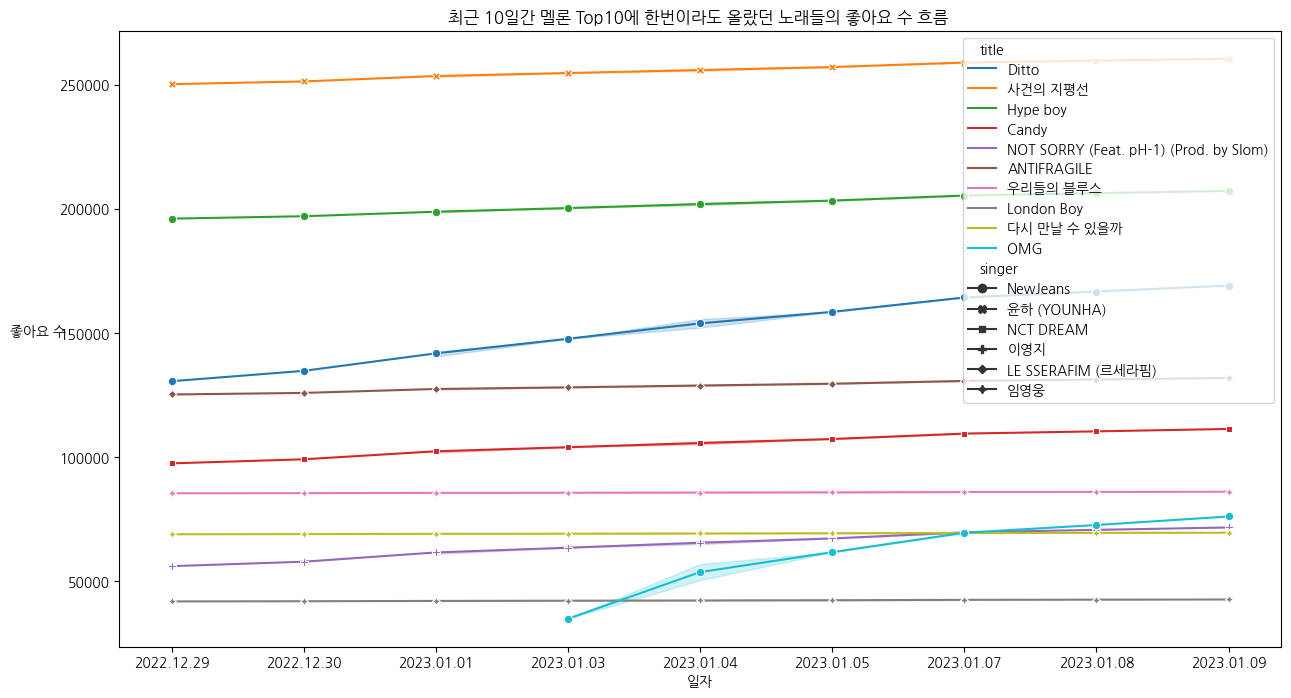

In [15]:
fig = plt.figure(figsize=(15, 8))
sns.lineplot(data=top10_total, x='date',y='likes',hue='title',markers=True,dashes=False,style='singer')
plt.title("최근 10일간 멜론 Top10에 한번이라도 올랐던 노래들의 좋아요 수 흐름 ")
plt.xlabel("일자")
plt.ylabel("좋아요 수",rotation=0,labelpad=15)
plt.show()

In [16]:
# 데이터 추출한 첫날 기준 좋아요수를 컬럼으로 추가하기
top10_rate= top10_total.loc[:,['date','title','singer','likes']].sort_values(by='likes',ascending=False)
last_like =top10_rate.drop_duplicates(subset='title',keep='last')
last_like = last_like.loc[:,['title','likes']]
last_like = last_like.rename(columns={"likes":"last_likes"})
last_like

,title,last_likes
1,사건의 지평선,250253
2,Hype boy,196062
0,Ditto,130552
5,ANTIFRAGILE,125203
3,Candy,97441
8,우리들의 블루스,85390
12,다시 만날 수 있을까,68869
4,NOT SORRY (Feat. pH-1) (Prod. by Slom),56026
10,London Boy,41818
701,OMG,34842


In [17]:
# 데이터 추출한 첫날 기준 좋아요수를 기준으로 비율구하기(증가, 감소 여부 확인)
merge_likes=pd.merge(top10_rate,last_like, how='left', on ='title')
merge_likes['like_rate']= merge_likes['likes']/ merge_likes['last_likes']
table1 = merge_likes.drop(columns=['likes','last_likes'])
table1= table1.sort_values(by='date',ascending=True).reset_index()
table1

,index,date,title,singer,like_rate
0,18,2022.12.29,사건의 지평선,윤하 (YOUNHA),1.000000
1,113,2022.12.29,우리들의 블루스,임영웅,1.000000
2,140,2022.12.29,다시 만날 수 있을까,임영웅,1.000000
3,94,2022.12.29,Candy,NCT DREAM,1.000000
4,60,2022.12.29,Ditto,NewJeans,1.000000
...,...,...,...,...,...
178,120,2023.01.09,다시 만날 수 있을까,임영웅,1.009032
179,116,2023.01.09,NOT SORRY (Feat. pH-1) (Prod. by Slom),이영지,1.278228
180,114,2023.01.09,OMG,NewJeans,2.182366
181,162,2023.01.09,London Boy,임영웅,1.018413


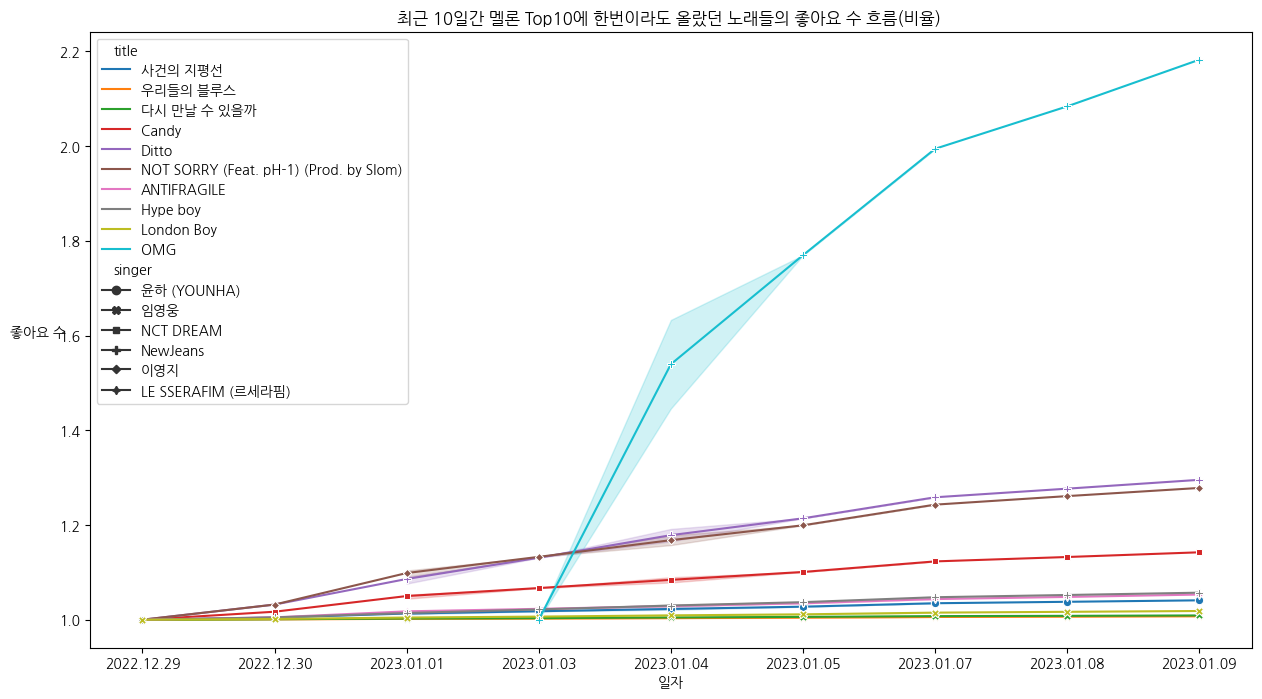

In [18]:
fig = plt.figure(figsize=(15, 8))
sns.lineplot(data=table1, x='date',y='like_rate',hue='title',markers=True,dashes=False,style='singer')
plt.title("최근 10일간 멜론 Top10에 한번이라도 올랐던 노래들의 좋아요 수 흐름(비율) ")
plt.xlabel("일자")
plt.ylabel("좋아요 수",rotation=0,labelpad=15)
plt.show()

### 최신 Top100에서 기획수 배출 순위 및 누적 좋아요 수 Top10 시각화

In [19]:
# 최신 노래에 대한 유니크한 데이터값
unique_sing =df1.drop_duplicates(subset='title',keep="last")
unique_sing.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date
273,63b06dcf2b0745ea8473c0f1,2023.01.01,02:13,74,-1,Santa Tell Me,Ariana Grande,Santa Tell Me,2292117,5475060,2014.11.24,POP,Universal Music Group,"Republic Records, a division of UMG Recordings...",233958,2023-01-01,2014-11-24,2960
276,63b06dcf2b0745ea8473c0f4,2023.01.01,02:13,77,0,미리 메리 크리스마스 (Feat. 천둥 Of MBLAQ),아이유,Real,1093562,3053259,2010.12.09,"발라드, 댄스",카카오엔터테인먼트,카카오엔터테인먼트,172502,2023-01-01,2010-12-09,4406
282,63b06dcf2b0745ea8473c0fa,2023.01.01,02:13,83,-1,크리스마스니까,성시경,Jelly Christmas 2012 HEART PROJECT,2168409,3973781,2012.12.06,발라드,카카오엔터테인먼트,젤리피쉬 엔터테인먼트,164901,2023-01-01,2012-12-06,3678
286,63b06dcf2b0745ea8473c0fe,2023.01.01,02:13,87,0,WE (Feat. 박재범) (Prod. by Slom),이영지,쇼미더머니 11 Episode 1,11115007,35888870,2022.12.03,랩/힙합,지니뮤직,Stone Music Entertainment,18990,2023-01-01,2022-12-03,29
289,63b06dcf2b0745ea8473c101,2023.01.01,02:13,90,0,Last Christmas,Ariana Grande,Christmas Kisses,2222050,4365842,2013.01.01,POP,Universal Music Group,Universal Records,60052,2023-01-01,2013-01-01,3652


In [20]:
# 가장 많이 순위가 오른 노래
df1.sort_values(by='up_down',ascending=True).head()
# +, -를 인식하지 못함

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date
1163,63b5870701a2834d0738540a,2023.01.04,23:02,64,+1,위하여 (We Higher) (Prod. GroovyRoom),그루비룸 (GroovyRoom),쇼미더머니 11 Episode 1,11115007,35888868,2022.12.03,랩/힙합,지니뮤직,Stone Music Entertainment,29953,2023-01-04,2022-12-03,32
248,63b06dcf2b0745ea8473c0d8,2023.01.01,02:13,49,+1,Say I Love You,우디 (Woody),Say I Love You (Re : WIND 4MEN Vol.04),11128774,35953611,2022.12.21,발라드,지니뮤직,메이저나인,11439,2023-01-01,2022-12-21,11
1280,63b5871d61ca2efc72458d95,2023.01.04,23:02,81,+1,"나침반 (Feat. UNEDUCATED KID, 수퍼비 (SUPERBEE)) (Pr...",KHAN,쇼미더머니 11 Episode 3,11125247,35937393,2022.12.17,랩/힙합,지니뮤직,Stone Music Entertainment,17940,2023-01-04,2022-12-17,18
258,63b06dcf2b0745ea8473c0e2,2023.01.01,02:13,59,+1,"나침반 (Feat. UNEDUCATED KID, 수퍼비 (SUPERBEE)) (Pr...",KHAN,쇼미더머니 11 Episode 3,11125247,35937393,2022.12.17,랩/힙합,지니뮤직,Stone Music Entertainment,17181,2023-01-01,2022-12-17,15
260,63b06dcf2b0745ea8473c0e4,2023.01.01,02:13,61,+1,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,10937474,34997078,2022.04.29,"랩/힙합, 댄스, 일렉트로니카",Dreamus,P NATION,128104,2023-01-01,2022-04-29,247


In [21]:
# Top100안에 많이 배출한 기획사 top10
visual1=unique_sing.groupby('album_agency')['singer'].count().to_frame().reset_index().sort_values(by='singer',ascending=False).head(10)
visual1

,album_agency,singer
41,물고기뮤직,12
22,Stone Music Entertainment,10
20,SM ENTERTAINMENT,10
50,스타쉽엔터테인먼트,9
2,(주)생각엔터테인먼트,8
4,ADOR,5
6,BIGHIT MUSIC,5
26,YG Entertainment,3
55,일팔 프로젝트,2
21,SM Entertainment,2


### Top100안에 많이 배출한 기획사 top10 시각화
##### **물고기뮤직** > Stone Music Entertainment > SM > 스타쉽엔터테인먼트 > (주)생각엔터테인먼트

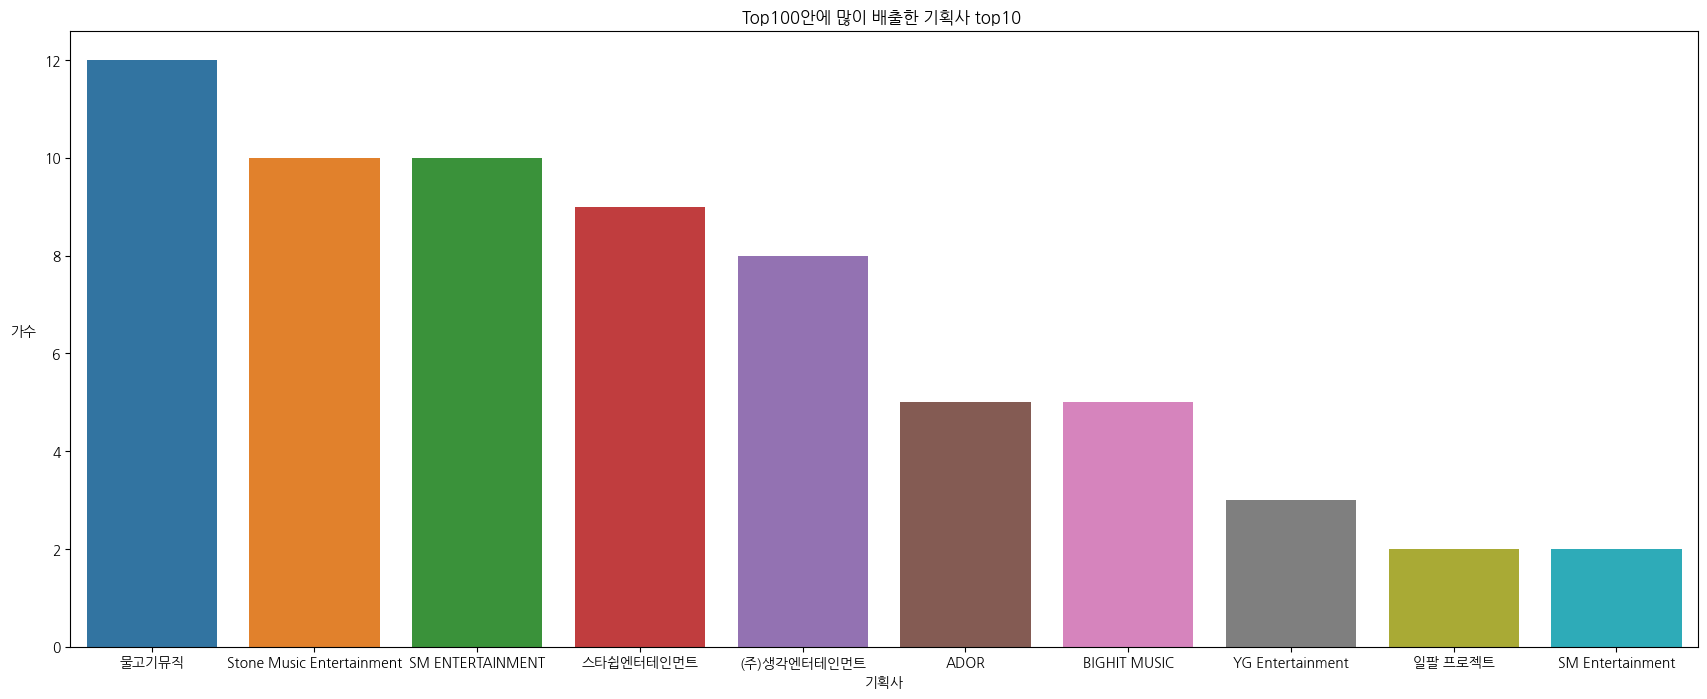

In [22]:
# Top100안에 많이 배출한 기획사 top10 시각화
fig = plt.figure(figsize=(21, 8))
sns.barplot(data=visual1,x='album_agency',y='singer')
plt.title("Top100안에 많이 배출한 기획사 top10 ")
plt.xlabel("기획사")
plt.ylabel("가수",rotation=0,labelpad=15)
plt.show()

In [23]:
# 누적 좋아요수가 높은 top10
visual2=unique_sing.groupby('singer')['likes'].sum().to_frame().reset_index().sort_values(by='likes',ascending=False).head(10)
visual2

,singer,likes
35,방탄소년단,1607491
50,임영웅,963192
19,NewJeans,763708
13,IVE (아이브),604881
18,NCT DREAM,517732
39,성시경,421887
61,폴킴,412745
48,이무진,399215
1,(여자)아이들,377055
52,잔나비,361274


### 누적 좋아요수가 높은 top10 시각화
##### **방탄소년단** > 임영웅 > 뉴진스 > 아이브 > NCT DREAM

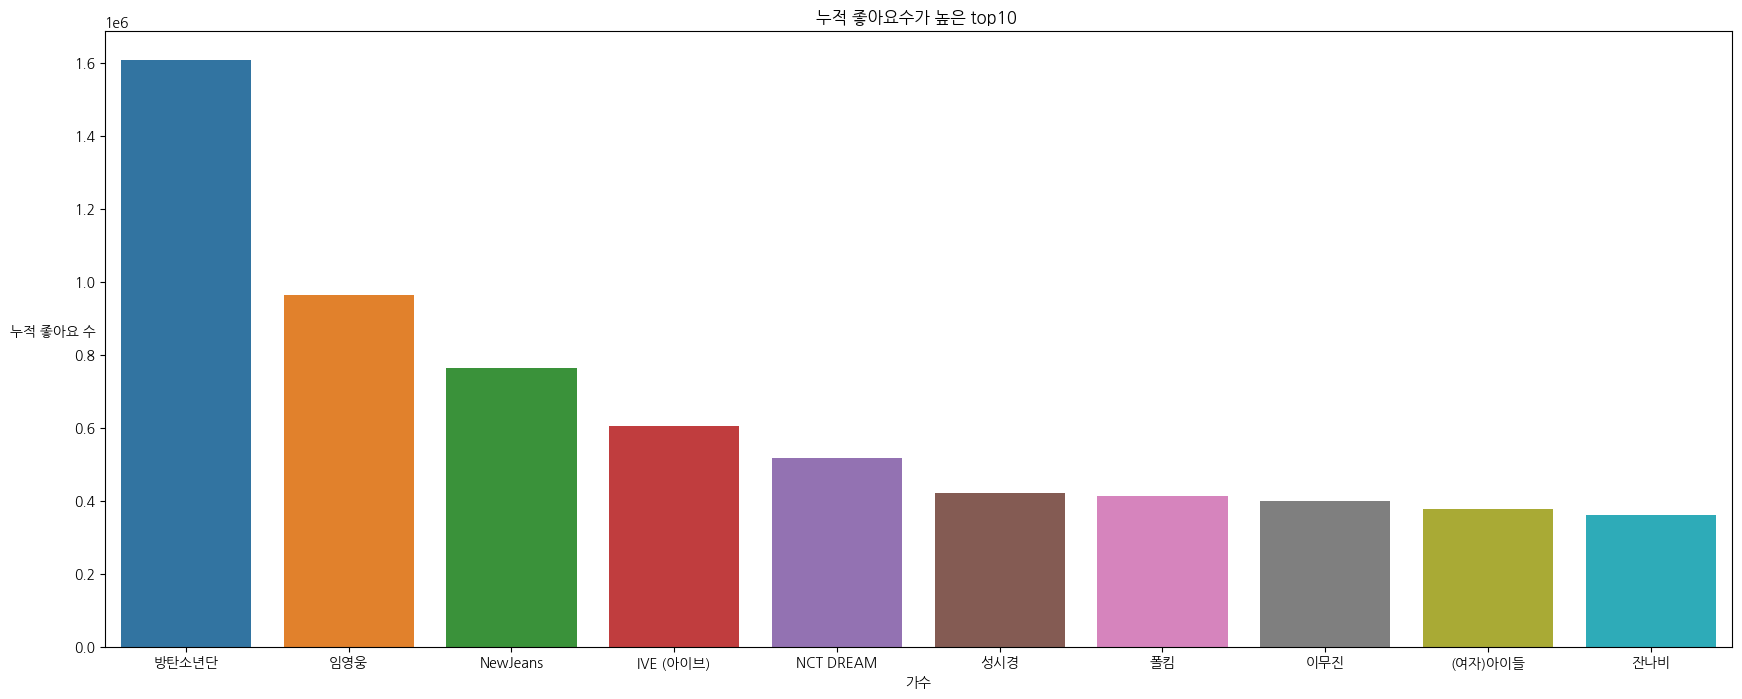

In [24]:
# 누적 좋아요수가 높은 top10 시각화
fig = plt.figure(figsize=(21, 8))
sns.barplot(data=visual2,x='singer',y='likes')
plt.title("누적 좋아요수가 높은 top10 ")
plt.xlabel("가수")
plt.ylabel("누적 좋아요 수",rotation=0,labelpad=15)
plt.show()

#### 경과된 일자와 좋아요 수 상관관계
-> 아주 약한 음의 상관관계 ==> 관계가 거의 없다!

In [25]:
# 경과일수와 좋아요수
date_corr=unique_sing.groupby('elapsed_date')['likes'].sum().to_frame().reset_index().sort_values(by='likes',ascending=False).head(10)
date_corr=date_corr.astype({"elapsed_date":"int"})
date_corr

,elapsed_date,likes
40,252,626547
34,2156,541766
22,161,518557
47,279,511271
72,549,461891
83,871,445037
27,1756,412745
16,1398,361274
28,184,328211
75,597,292857


In [26]:
# 경과일수와 좋아요 수 상관계수
corrcoef_elapsed= np.corrcoef(date_corr['elapsed_date'],date_corr['likes'])[0,1]
corrcoef_elapsed

-0.04974153454794488

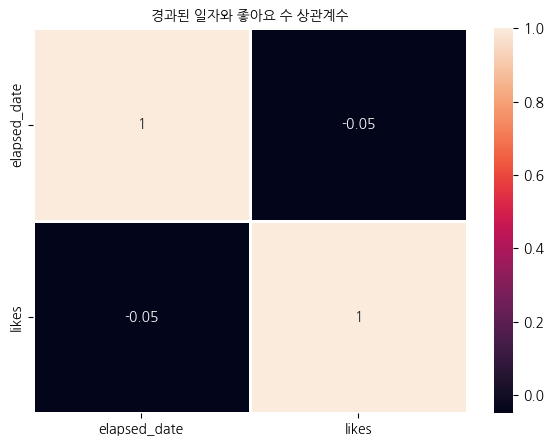

In [27]:
# 히트맵 이용하여 상관관계 확인하기 -> 아주 약한 음의 상관관계! => 관계가 거의 없다.
plt.rcParams["figure.figsize"] =(7, 5)
sns.heatmap(date_corr.corr(), annot=True, linewidths=1)
plt.title('경과된 일자와 좋아요 수 상관계수', fontsize=10)
plt.show()

## 궁극적인 의문
#### 단기간 내에 좋아요수가 가장 빠르게 오른 핫한 가수는 누구일까?
#### 한곡이아닌 여러곡의 좋아요에 따른 그래프를 한 캔버스에 그릴 수 있을까?(진행중)

### 1. 우선 인기 가수 노래 1곡에 대한 경과일과 좋아요 수 추이 확인 
##### 약 6년된 ``방탄소년단의 봄날``의 경우에는 경과일수가 늘어남에 따라 ``좋아요`` 수가 ``감소``한다.
##### 최신 핫한 ``뉴진스의 Hype boy``의 경우에는 경과일수가 늘어남에 따라 ``좋아요 수``가 ``급 상승``한다.

In [28]:
# 방탄소년단 봄날 데이터만 저장
singer=df[df['singer']=="방탄소년단"]
singer.sort_values(by='album_date',ascending=True)
singer_title =singer[singer['title']=='봄날']
#singer_title=singer.copy()
singer_title.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime
73,63ada61bf8fc5d9fc24b1453,2022.12.29,23:36,74,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542409,2022-12-29,2017-02-13
166,63aef188e4203c768feab9f2,2022.12.30,23:10,67,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542330,2022-12-30,2017-02-13
279,63b06dcf2b0745ea8473c0f7,2023.01.01,02:13,80,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542309,2023-01-01,2017-02-13
368,63b190c9eab1df6655a1753a,2023.01.01,22:55,69,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264,2023-01-01,2017-02-13
468,63b190e77fc8ef4536cc628a,2023.01.01,22:55,69,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264,2023-01-01,2017-02-13


In [29]:
# Airflow로 자동화 구현하였으나 VirtualBox 서버를 켜야만 가능하다는 점에 수동으로 데이터 수집
singer_title=singer_title.replace({'date':'2023.01.03'},'2023.01.02')
singer_top_title=singer_title.drop_duplicates(subset='date',keep='last')
# bts_spring=bts_spring.sort_values(by='likes',ascending=False)
singer_top_title

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime
73,63ada61bf8fc5d9fc24b1453,2022.12.29,23:36,74,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542409,2022-12-29,2017-02-13
166,63aef188e4203c768feab9f2,2022.12.30,23:10,67,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542330,2022-12-30,2017-02-13
668,63b192cd2814be3e5a87c6af,2023.01.01,23:03,69,0,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264,2023-01-01,2017-02-13
865,63b2f611dd2a3a3cb6b918df,2023.01.02,00:19,66,0,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264,2023-01-03,2017-02-13
1270,63b5871d61ca2efc72458d8b,2023.01.04,23:02,71,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542071,2023-01-04,2017-02-13
1468,63b6d8175d0f94b5d8b98337,2023.01.05,23:00,69,+4,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542011,2023-01-05,2017-02-13
1669,63b988e683a34972b2c65130,2023.01.07,23:59,70,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,541924,2023-01-07,2017-02-13
1764,63bacd3364caecf725179b5e,2023.01.08,23:03,65,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,541839,2023-01-08,2017-02-13
1867,63bc29fae762c301cd87c3d9,2023.01.09,23,68,-4,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,541766,2023-01-09,2017-02-13


In [30]:
# 발매 경과 일자 컬럼추가
singer_top_title['elapsed_date']=singer_top_title['date_datetime']-singer_top_title['album_date_datetime']
singer_top_title.head()

/home/skpark/anaconda3/envs/airflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date
73,63ada61bf8fc5d9fc24b1453,2022.12.29,23:36,74,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542409,2022-12-29,2017-02-13,2145 days
166,63aef188e4203c768feab9f2,2022.12.30,23:10,67,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542330,2022-12-30,2017-02-13,2146 days
668,63b192cd2814be3e5a87c6af,2023.01.01,23:03,69,0,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264,2023-01-01,2017-02-13,2148 days
865,63b2f611dd2a3a3cb6b918df,2023.01.02,00:19,66,0,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264,2023-01-03,2017-02-13,2150 days
1270,63b5871d61ca2efc72458d8b,2023.01.04,23:02,71,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542071,2023-01-04,2017-02-13,2151 days


In [31]:
# 문자열로 변환
singer_top_title=singer_top_title.astype({'elapsed_date':'str'})

# 경과일자에 days 제거
singer_top_title['elapsed_date']=singer_top_title['elapsed_date'].apply(days_to_int)
singer_top_title

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date
73,63ada61bf8fc5d9fc24b1453,2022.12.29,23:36,74,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542409,2022-12-29,2017-02-13,2145
166,63aef188e4203c768feab9f2,2022.12.30,23:10,67,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542330,2022-12-30,2017-02-13,2146
668,63b192cd2814be3e5a87c6af,2023.01.01,23:03,69,0,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264,2023-01-01,2017-02-13,2148
865,63b2f611dd2a3a3cb6b918df,2023.01.02,00:19,66,0,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264,2023-01-03,2017-02-13,2150
1270,63b5871d61ca2efc72458d8b,2023.01.04,23:02,71,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542071,2023-01-04,2017-02-13,2151
1468,63b6d8175d0f94b5d8b98337,2023.01.05,23:00,69,+4,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542011,2023-01-05,2017-02-13,2152
1669,63b988e683a34972b2c65130,2023.01.07,23:59,70,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,541924,2023-01-07,2017-02-13,2154
1764,63bacd3364caecf725179b5e,2023.01.08,23:03,65,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,541839,2023-01-08,2017-02-13,2155
1867,63bc29fae762c301cd87c3d9,2023.01.09,23,68,-4,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,541766,2023-01-09,2017-02-13,2156


<AxesSubplot:xlabel='elapsed_date', ylabel='likes'>

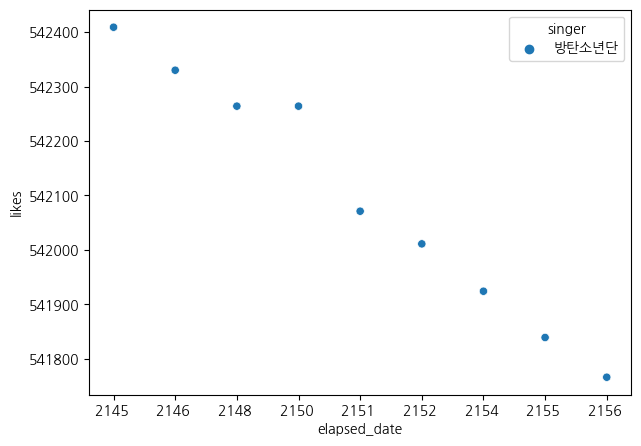

In [32]:
# 방탄소년단 봄날 좋아요수 추이
# 경과된 일자가 길어질수록 좋아요 수가 떨어지는 추세이다!
sns.scatterplot(data=singer_top_title, x='elapsed_date',y='likes',hue='singer')